In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

In [5]:
# generate the price df
# Define a list of stock tickers
stock_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVO", "JPM", "V", "MA", "KO"]

# Create an empty DataFrame to store the stock prices
df_price = pd.DataFrame()

# Loop through the list of stock tickers and fetch their historical data
for ticker in stock_tickers:
    # Fetch historical data from Yahoo Finance
    stock_data = yf.Ticker(ticker)
    historical_data = stock_data.history(period="1d", start="2018-01-01", end="2022-12-31")
    
    # Extract the adjusted closing prices
    df_price[ticker] = historical_data['Close']

# Insert the date 
df_price.insert(0, "Date", historical_data.index.date)
    
# Display the DataFrame with stock prices
df_price
# Check for NaN values
# sum(df.isna().sum())

Date        AAPL        MSFT      GOOGL  \
Date                                                                       
2018-01-02 00:00:00-05:00  2018-01-02   40.722878   80.229042  53.660500   
2018-01-03 00:00:00-05:00  2018-01-03   40.715790   80.602394  54.576000   
2018-01-04 00:00:00-05:00  2018-01-04   40.904907   81.311798  54.787998   
2018-01-05 00:00:00-05:00  2018-01-05   41.370628   82.319893  55.514500   
2018-01-08 00:00:00-05:00  2018-01-08   41.216965   82.403923  55.710499   
...                               ...         ...         ...        ...   
2022-12-23 00:00:00-05:00  2022-12-23  131.127045  236.631790  89.230003   
2022-12-27 00:00:00-05:00  2022-12-27  129.307251  234.877380  87.389999   
2022-12-28 00:00:00-05:00  2022-12-28  125.339417  232.468735  86.019997   
2022-12-29 00:00:00-05:00  2022-12-29  128.889572  238.891785  88.449997   
2022-12-30 00:00:00-05:00  2022-12-30  129.207794  237.712234  88.230003   

                                AMZN        TSLA        NVO         JPM  \
Date                                                                      
2018-01-02 00:00:00-05:00  59.450500   21.368668  22.025017   90.125519   
2018-01-03 00:00:00-05:00  60.209999   21.150000  22.236485   90.217354   
2018-01-04 00:00:00-05:00  60.479500   20.974667  22.159218   91.509766   
2018-01-05 00:00:00-05:00  61.457001   21.105333  22.260885   90.922302   
2018-01-08 00:00:00-05:00  62.343498   22.427334  22.240549   91.056587   
...                              ...         ...        ...         ...   
2022-12-23 00:00:00-05:00  85.250000  123.150002  65.303764  126.698761   
2022-12-27 00:00:00-05:00  83.040001  109.099998  64.938255  127.142708   
2022-12-28 00:00:00-05:00  81.820000  112.709999  65.084457  127.837593   
2022-12-29 00:00:00-05:00  84.180000  121.820000  65.888573  128.571060   
2022-12-30 00:00:00-05:00  84.000000  123.180000  65.956795  129.420364   

                                    V          MA         KO  
Date                                                          
2018-01-02 00:00:00-05:00  109.938263  146.955887  37.655876  
2018-01-03 00:00:00-05:00  111.032761  148.803619  37.573185  
2018-01-04 00:00:00-05:00  111.445587  150.728714  38.102383  
2018-01-05 00:00:00-05:00  114.114586  153.853363  38.094120  
2018-01-08 00:00:00-05:00  114.575401  154.318436  38.036243  
...                               ...         ...        ...  
2022-12-23 00:00:00-05:00  204.208359  341.516266  61.868103  
2022-12-27 00:00:00-05:00  204.664719  344.060699  62.246178  
2022-12-28 00:00:00-05:00  203.374985  339.876251  61.625751  
2022-12-29 00:00:00-05:00  206.420792  346.098267  61.994133  
2022-12-30 00:00:00-05:00  206.123154  345.621216  61.664528  

[1259 rows x 11 columns]

In [6]:
# define a function plotting line chart of selected stocks
def plot_fin_data(df,title):
    fig = px.line( title = title )
    
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    
    fig.show()

In [24]:
plot_fin_data(df_price, 'Stock Price')

In [9]:
# Generate the return df
df_returns = df_price.iloc[:,1:].pct_change() * 100
df_returns.insert(0, "Date", historical_data.index.date)

In [6]:
plot_fin_data(df_returns, 'Daily Return')

In [7]:
# Display the histogram of stocks daily returns
fig = px.histogram(df_returns.drop(columns = ['Date']), nbins = 500)
fig.show()

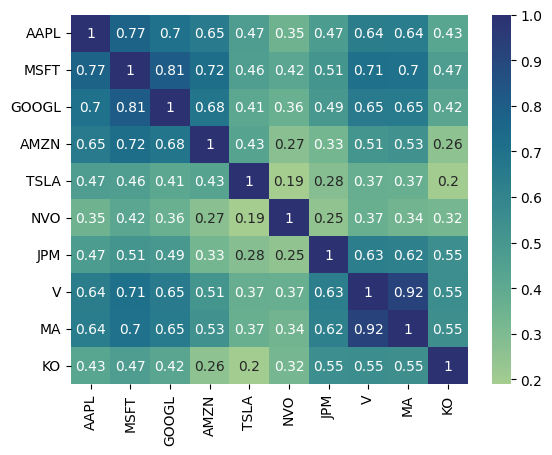

In [8]:
# Display the correlation between stocks daily returns
sns.heatmap(df_returns.drop(columns = ['Date']).corr(), annot = True, cmap="crest");

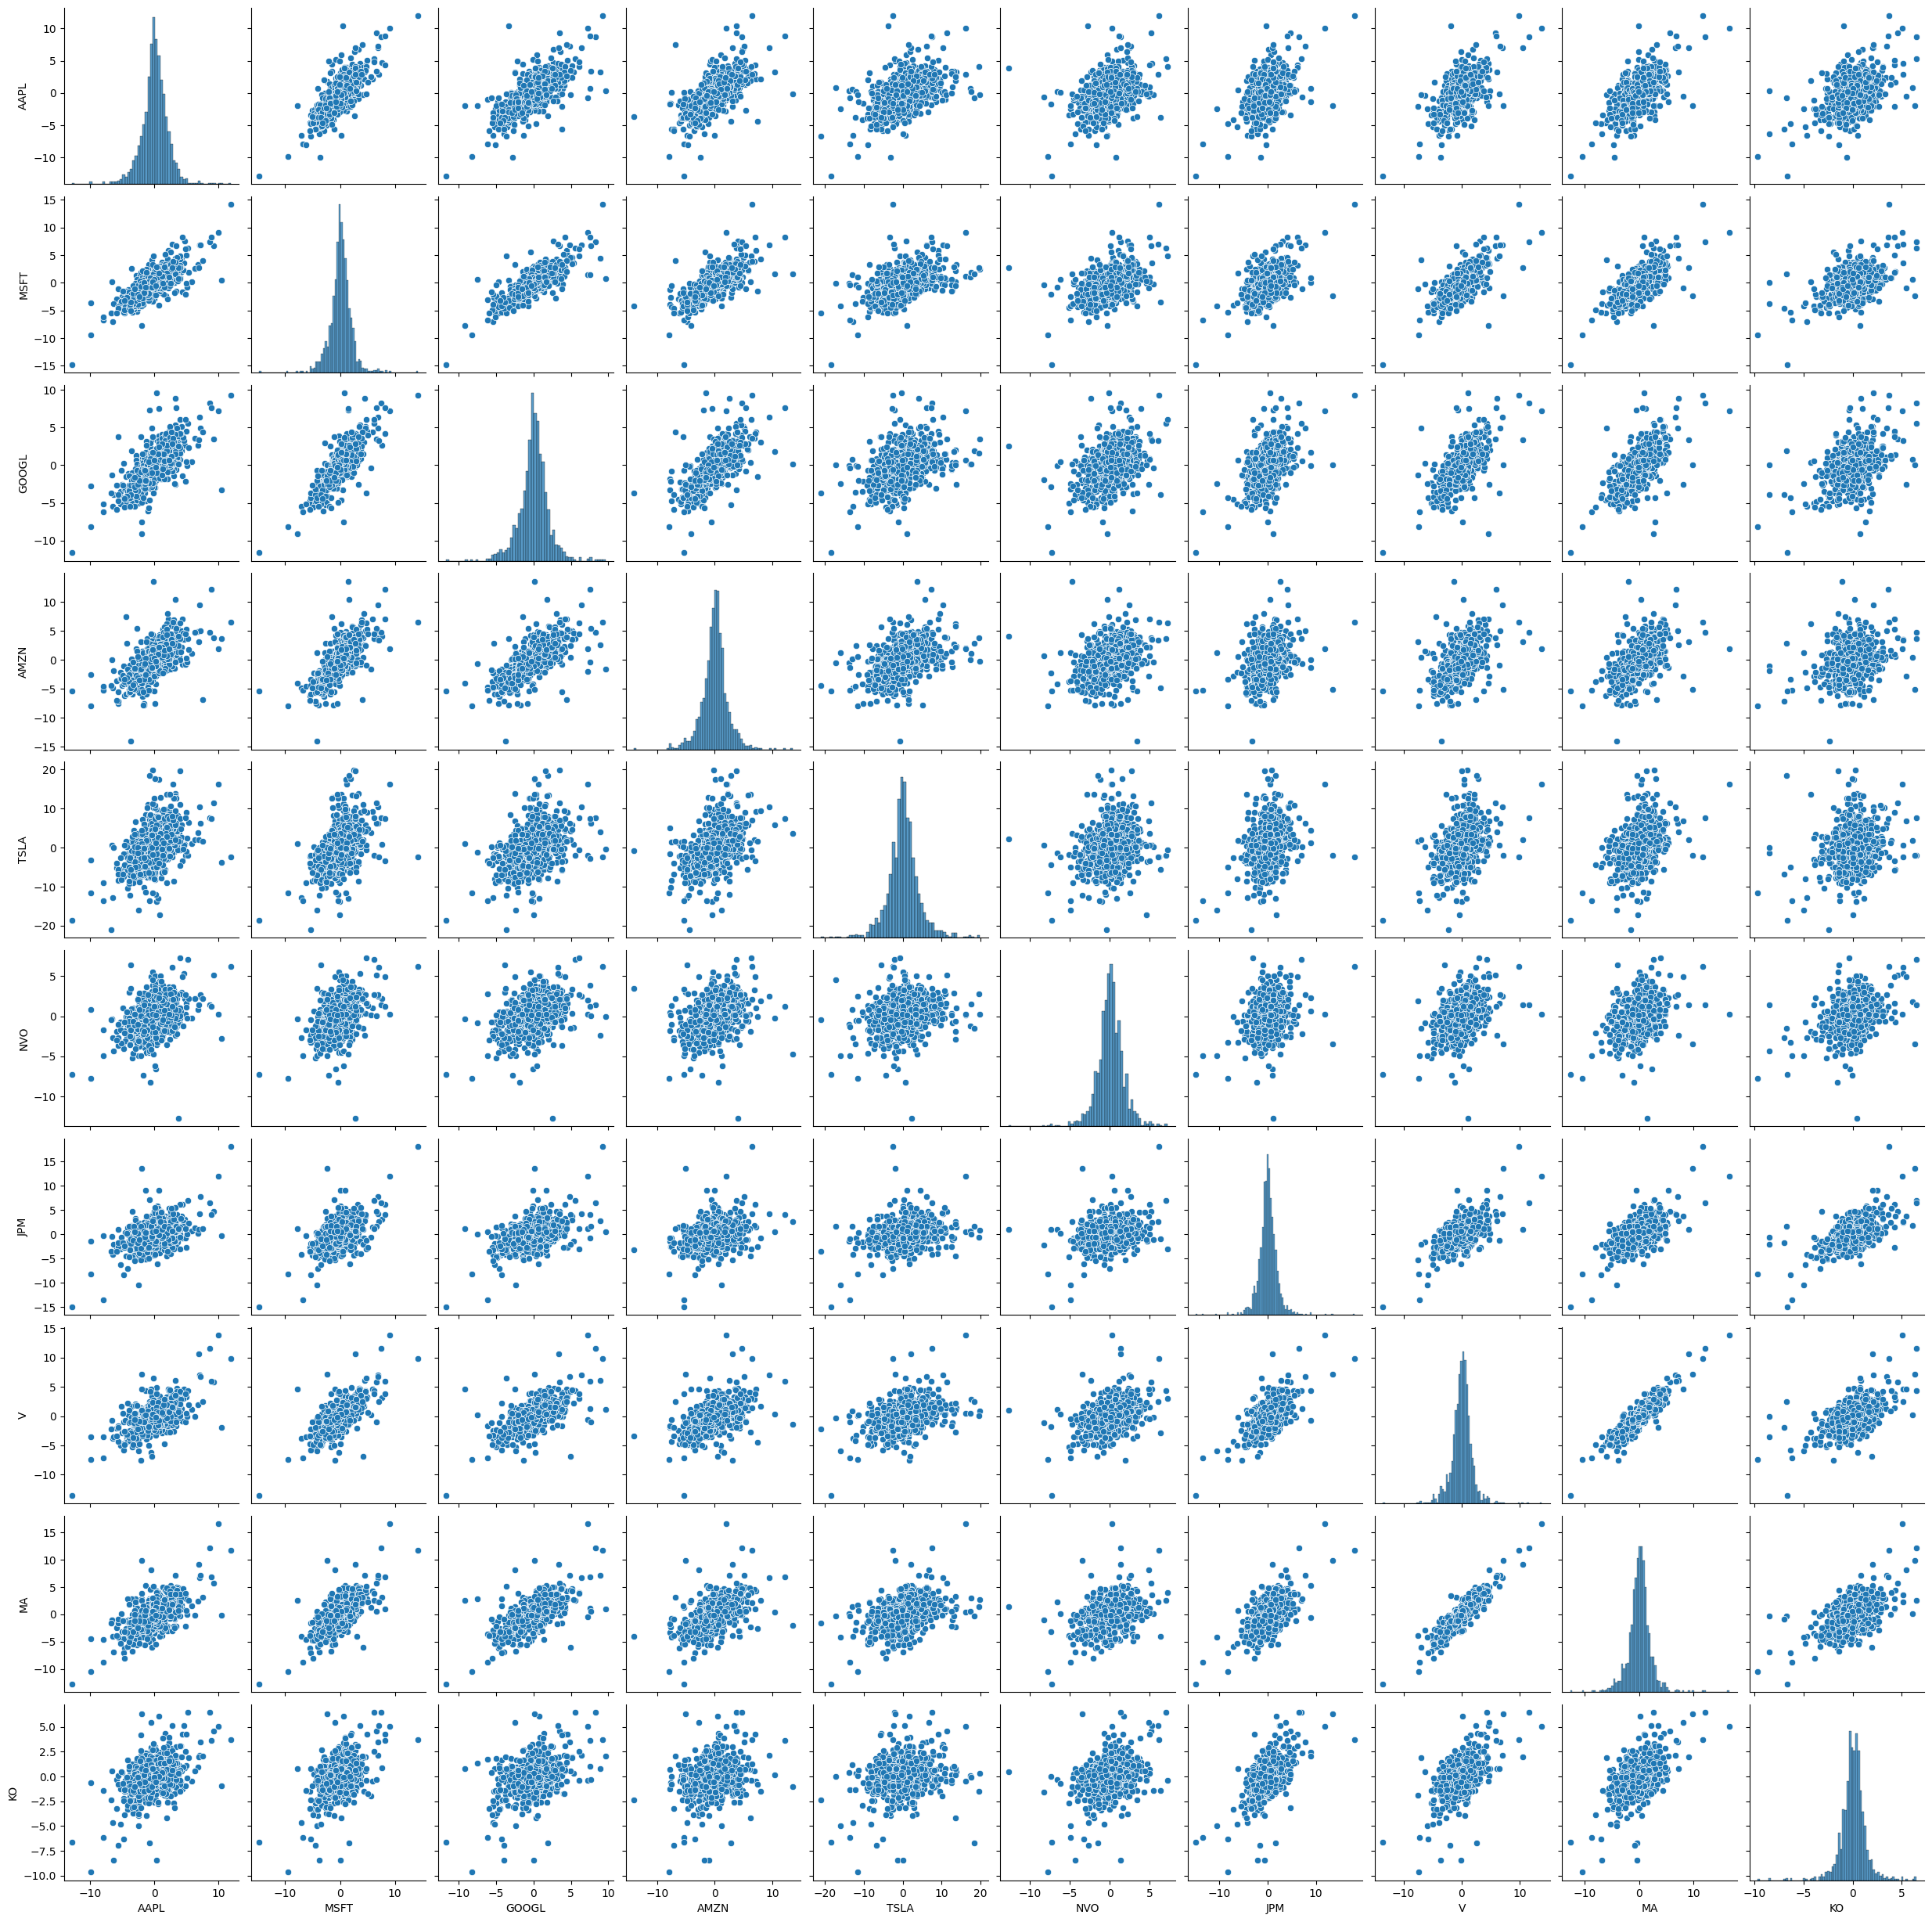

In [9]:
# Plot the Pairplot between stocks daily returns
sns.pairplot(df_returns)

In [48]:
# Define a function that can generate random numbers sum up to 1 to present the weights
def gen_RdnWgt(nums, rnd=5):
    weights = []
    for num in range(nums):
        weights.append(random.random())
    total = np.sum(weights)
    weights = np.array([round(w / total, rnd) for w in weights])
    return weights

In [49]:
weights = gen_RdnWgt(10)
sum(weights)
print(type(weights))

<class 'numpy.ndarray'>


In [30]:
# Define a function that rescale the price at the first date to 1 to help create the portfolio
def price_rescaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [31]:
# Display the rescaled price
df_Pscaled = price_rescaling(df_price)
plot_fin_data(df_Pscaled, 'Rescaled_price')

In [32]:

def asset_allocation(df, weights, initial_investment):
    portfolio_df = df.copy()

    # Scale stock prices using the "price_scaling" function that we defined earlier (Make them all start at 1)
    scaled_df = price_rescaling(df)
  
    for i, stock in enumerate(scaled_df.columns[1:]):
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment

    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    # Note that we excluded the date column from this calculation
    portfolio_df['Portfolio Value'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1, numeric_only = True)
            
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Portfolio Daily Return'] = portfolio_df['Portfolio Value'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
    
    return portfolio_df

In [38]:
df_pfl = asset_allocation(df_price, weights, 100000)
# df_pfl

In [34]:
# Display the stock positions
plot_fin_data(df_pfl.drop(['Portfolio Value', 'Portfolio Daily Return'], axis = 1), 'Portfolio positions [$]')

In [35]:
# Display the portfolio value
plot_fin_data(df_pfl[['Date', 'Portfolio Value']], 'Total Portfolio Value [$]')

In [36]:
# Display the return rate
plot_fin_data(df_pfl[['Date','Portfolio Daily Return']], 'Portfolio Daily Return')

In [37]:
# Display the distribtuion of return rate
fig = px.histogram(df_pfl['Portfolio Daily Return'], nbins=200)
fig.show()

In [136]:
# Perform Monte Carlo simulation and calculate the sharpe ratio
def MC_sim(df_price, initial_investment, rf, n_runs = 1000):
    # Placeholder to store all weights
    weights_runs = np.zeros((n_runs, df_price.shape[1]-1))

    # Placeholder to store all Sharpe ratios
    sharpe_ratio_runs = np.zeros(n_runs)

    # Placeholder to store all expected returns
    expected_portfolio_returns_runs = np.zeros(n_runs)

    # Placeholder to store all volatility values
    volatility_runs = np.zeros(n_runs)

    # Placeholder to store all returns on investment
    return_on_investment_runs = np.zeros(n_runs)

    # Placeholder to store all final portfolio values
    final_value_runs = np.zeros(n_runs)

    for i in range(n_runs):
        weights = gen_RdnWgt(df_price.shape[1]-1)
        # Store the weights
        weights_runs[i,:] = weights
        # Calculate the portfolio
        pfl = asset_allocation(df_price, weights, initial_investment)
        # store the final value 
        final_value_runs[i] = pfl['Portfolio Value'][-1:].values[0]
        
        # calculate portfolio return
        return_on_investment = ((pfl['Portfolio Value'][-1:] - 
                             pfl['Portfolio Value'][0])/ 
                             pfl['Portfolio Value'][0]) * 100
        return_on_investment_runs[i] = return_on_investment
        
        # Calculate the daily change of each stock in the portfolio
        pfl_daily_return_df = pfl.drop(columns = ['Date', 'Portfolio Value', 'Portfolio Daily Return'])
        pfl_daily_return_df = pfl_daily_return_df.pct_change(1) 
        # Calculate the expected return 
        # Calculate the weighted average daily return for the portfolio
        portfolio_daily_return = (pfl_daily_return_df * weights).sum(axis=1)

        # Calculate the cumulative portfolio return
        cul_return = np.prod(1 + portfolio_daily_return) - 1

        # Calculate the expected return (Convert to annual return (adjust 252 based on your preferences))
        exp_return = (1 + cul_return) ** (252 / len(portfolio_daily_return)) - 1
        expected_portfolio_returns_runs[i] = exp_return
        
        # Calculate the portfolio volatility
        covariance = pfl_daily_return_df.cov() * 252 
        expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
        volatility_runs[i] = expected_volatility
        
        # Decide the risk free rate of return
        rf = rf
        
        # Calculate Sharpe ratio
        sharpe_ratio = (exp_return - rf)/expected_volatility 
        sharpe_ratio_runs[i] = sharpe_ratio
        
    return expected_portfolio_returns_runs, volatility_runs, sharpe_ratio_runs, final_value_runs, return_on_investment_runs, weights_runs

In [137]:
# Perform 1000 times of simulation
expected_portfolio_returns_runs, volatility_runs, sharpe_ratio_runs, final_value_runs, return_on_investment_runs, weights_runs = MC_sim(df_price, 1000000, 0.0271, n_runs=1000)

In [138]:
# Return the index of the maximum Sharpe ratio (Best simulation run) 
print(sharpe_ratio_runs.argmax())
# Return the maximum Sharpe ratio value
print(sharpe_ratio_runs.max())
# Return the volatility corresponding to the maximum Sharpe ratio
print(volatility_runs[sharpe_ratio_runs.argmax()])
# Obtain the portfolio weights that correspond to the maximum Sharpe ratio
weights_runs[sharpe_ratio_runs.argmax(), :]

561
0.9921581968037771
0.23988275886702262


array([1.9145e-01, 3.1880e-02, 1.7000e-04, 3.9230e-02, 1.1367e-01,
       2.6779e-01, 1.0050e-02, 5.6900e-02, 1.5905e-01, 1.2979e-01])

In [139]:
# Create a df of volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

Volatility  Portfolio_Return  Sharpe_Ratio
0      0.249239          0.224495      0.791991
1      0.257636          0.233535      0.801266
2      0.248500          0.230428      0.818220
3      0.276073          0.252982      0.818195
4      0.238930          0.224620      0.826688
..          ...               ...           ...
995    0.249533          0.186561      0.639036
996    0.272056          0.261499      0.861584
997    0.235298          0.194261      0.710422
998    0.263453          0.238629      0.802913
999    0.234002          0.178191      0.645683

[1000 rows x 3 columns]

In [140]:
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.update_layout({'plot_bgcolor': "white"})
fig.show()

In [141]:
import plotly.graph_objects as go
fig = px.scatter(sim_out_df, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio', size = 'Sharpe_Ratio', hover_data = ['Sharpe_Ratio'] )
fig.add_trace(go.Scatter(x = [volatility_runs[sharpe_ratio_runs.argmax()]], 
                         y = [expected_portfolio_returns_runs[sharpe_ratio_runs.argmax()]], 
                         mode = 'markers', name = 'Optimal Point', marker = dict(size=[40], color = 'red')))
fig.update_layout({'plot_bgcolor': "white"})
fig.show()